In [60]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse

# Download NLTK resources (run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Read True.csv line by line
true_data_list = []
with open('/content/True.csv', 'r', encoding='utf-8', errors='ignore') as true_file:
    for line in true_file:
        try:
            true_data_list.append(line.strip())
        except Exception as e:
            print(f"Error reading line from True CSV: {e}")

# Convert the list of lines into a DataFrame for True data
true_data = pd.DataFrame({'text': true_data_list, 'label': 1})

# Read Fake.csv line by line
fake_data_list = []
with open('/content/Fake.csv', 'r', encoding='utf-8', errors='ignore') as fake_file:
    for line in fake_file:
        try:
            fake_data_list.append(line.strip())
        except Exception as e:
            print(f"Error reading line from Fake CSV: {e}")

# Convert the list of lines into a DataFrame for Fake data
fake_data = pd.DataFrame({'text': fake_data_list, 'label': 0})

# Combine True and Fake data
data = pd.concat([true_data, fake_data])

# Fill missing values in the 'text' column with an empty string
data['text'].fillna('', inplace=True)

# Define text preprocessing functions
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    return ' '.join(lemmatized_tokens)

# Apply text preprocessing to the 'text' column
data['processed_text'] = data['text'].apply(preprocess_text)

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the entire corpus to ensure consistent vocabulary
full_corpus_tfidf = vectorizer.fit_transform(data['processed_text'])

# Process the data in smaller chunks to handle memory efficiently
chunk_size = 1000
tfidf_matrices = []
for i in range(0, len(data), chunk_size):
    batch = data['processed_text'][i:i+chunk_size]
    tfidf_matrix = vectorizer.transform(batch)
    tfidf_matrices.append(tfidf_matrix)

# Concatenate TF-IDF matrices
tfidf_matrix_final = sparse.vstack(tfidf_matrices)

# Display the TF-IDF Sparse Matrix
print(tfidf_matrix_final)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


  (0, 93463)	0.564281365981249
  (0, 92251)	0.5318466724042982
  (0, 89600)	0.43606520316472
  (0, 27288)	0.456697707075175
  (1, 103503)	0.03114671432173009
  (1, 103250)	0.025403042402655486
  (1, 103142)	0.04400570424291176
  (1, 102129)	0.03908302528241286
  (1, 102030)	0.021850781630497314
  (1, 101437)	0.03472528791461262
  (1, 101359)	0.058915529547864845
  (1, 101111)	0.01843036866105304
  (1, 100776)	0.02594208797872189
  (1, 100718)	0.020208809961061367
  (1, 100716)	0.04431798070800178
  (1, 100588)	0.03503147327434928
  (1, 100571)	0.044256375150184615
  (1, 100348)	0.019242779492638612
  (1, 100183)	0.034804033744743466
  (1, 100039)	0.07669389181088225
  (1, 99942)	0.058307544294176505
  (1, 99504)	0.09539544784778516
  (1, 99500)	0.02191589520230102
  (1, 97860)	0.02424271432122188
  (1, 97765)	0.033226964943003805
  :	:
  (34467, 10158)	0.021337288444930887
  (34467, 10118)	0.02637811844089481
  (34467, 9519)	0.05575303037118992
  (34467, 8930)	0.032879661519776365
  (3

This code prepares the text data from True.csv and Fake.csv, applies text preprocessing, and converts the text into TF-IDF representations, handling memory efficiently by processing the data in smaller chunks. The final TF-IDF matrix is displayed at the end.

In [72]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load True and Fake datasets


# Initialize an empty list to store lines from the CSV file
data = []

# Read the CSV file while handling errors and skipping problematic lines
with open('/content/True.csv', 'r', encoding='utf-8', errors='ignore') as file:
    for line in file:
        try:
            data.append(line.strip())
        except Exception as e:
            print(f"Error reading line: {e}")

# Convert the list of lines into a DataFrame
true_data = pd.DataFrame({'text': data})

# Repeat the same process for the 'Fake.csv' file
# Adjust the file path accordingly
data = []
with open('/content/Fake.csv', 'r', encoding='utf-8', errors='ignore') as file:
    for line in file:
        try:
            data.append(line.strip())
        except Exception as e:
            print(f"Error reading line: {e}")

fake_data = pd.DataFrame({'text': data})

# Now you can proceed with further data preprocessing, tokenization, or analysis


# Add label to distinguish between True and Fake
true_data['label'] = 1
fake_data['label'] = 0

# Concatenate both datasets
combined_data = pd.concat([true_data, fake_data], ignore_index=True)

# Define features and target variable
X = combined_data['text']  # Features: text column
y = combined_data['label']  # Target variable: label column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Transform text data into numerical vectors
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the Logistic Regression model
logreg_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = logreg_model.predict(X_test_tfidf)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print(classification_report(y_test, y_pred))






Accuracy: 0.9913
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3480
           1       0.99      0.99      0.99      3414

    accuracy                           0.99      6894
   macro avg       0.99      0.99      0.99      6894
weighted avg       0.99      0.99      0.99      6894



The overall goal is to load, preprocess, and train a Logistic Regression model on a dataset containing text information to classify whether the news is true or fake, and then evaluate the model's performance. The TF-IDF vectorizer is used to convert text data into a format suitable for machine learning models.

In [70]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_classif

# Load True and Fake datasets
true_data_list = []
with open('/content/True.csv', 'r', encoding='utf-8', errors='ignore') as true_file:
    for line in true_file:
        try:
            true_data_list.append(line.strip())
        except Exception as e:
            print(f"Error reading line from True CSV: {e}")

fake_data_list = []
with open('/content/Fake.csv', 'r', encoding='utf-8', errors='ignore') as fake_file:
    for line in fake_file:
        try:
            fake_data_list.append(line.strip())
        except Exception as e:
            print(f"Error reading line from Fake CSV: {e}")

# Convert the list of lines into DataFrames for True and Fake data
true_data = pd.DataFrame({'text': true_data_list, 'label': 1})
fake_data = pd.DataFrame({'text': fake_data_list, 'label': 0})

# Concatenate True and Fake datasets
df = pd.concat([true_data, fake_data], ignore_index=True)

# Assuming you've processed the text and stored it in the 'text' column
# Fill missing values in the 'text' column with an empty string
df['text'].fillna('', inplace=True)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['text'])

# Feature Selection using SelectKBest
num_features_to_select = 1000  # Number of features to select
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
selected_features = selector.fit_transform(tfidf_matrix, df['label'])

# Get selected feature names
feature_names = np.array(vectorizer.get_feature_names_out())[selector.get_support()]

# Create a DataFrame with selected features
selected_features_df = pd.DataFrame(selected_features.toarray(), columns=feature_names)

# Display the selected features DataFrame
print(selected_features_df)



           2015      2016  2016featured  2016the      2017  2017featured  \
0      0.000000  0.000000           0.0      0.0  0.000000           0.0   
1      0.000000  0.000000           0.0      0.0  0.010769           0.0   
2      0.000000  0.000000           0.0      0.0  0.019147           0.0   
3      0.000000  0.015811           0.0      0.0  0.014636           0.0   
4      0.000000  0.033242           0.0      0.0  0.015386           0.0   
...         ...       ...           ...      ...       ...           ...   
34463  0.000000  0.000000           0.0      0.0  0.015660           0.0   
34464  0.021833  0.036366           0.0      0.0  0.011221           0.0   
34465  0.000000  0.017384           0.0      0.0  0.016093           0.0   
34466  0.016709  0.009277           0.0      0.0  0.008588           0.0   
34467  0.032199  0.017877           0.0      0.0  0.000000           0.0   

       2017the  2017trump      2018  2019  ...  yemen  yes  yesterday  \
0          0.0

The resulting selected_features_df contains the transformed data with the selected features. This kind of feature selection can be useful for improving the efficiency and performance of machine learning models by focusing on the most relevant features.

Enter a URL- https://timesofindia.indiatimes.com/india/us-panel-on-religious-freedom-calls-for-sanction-on-india-for-nijjar-killing-even-before-case-is-concluded/articleshow/106050732.cms?from=mdr


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Sentence: US watchdog on religious freedom cites Nijjar, Pannun plots, calls for India curbs
Logistic Regression Probability: 0.33049629041953127
Neural Network Probability: 0.7561500207184797
Sentence: TOI
Logistic Regression Probability: 0.27741884868849837
Neural Network Probability: 0.48566327275333254
Sentence: Visual Stories
Logistic Regression Probability: 0.2764375843323676
Neural Network Probability: 0.34601135109476855
Sentence: Trending Stories
Logistic Regression Probability: 0.31636551028347576
Neural Network Probability: 0.4008310523506991
Sentence: Elections
Logistic Regression Probability: 0.38129862754287946
Neural Network Probability: 0.7050086389925941
Sentence: TOP TRENDS
Logistic Regression Probability: 0.3318550736366183
Neural Network Probability: 0.6545397682964474
Sentence: Other Times Group News Sites
Logistic Regression Probability: 0.06912966446978026
Neural Network Probability: 0.4423406957523507
Sentence: Popular Categories
Logistic Regression Probability:

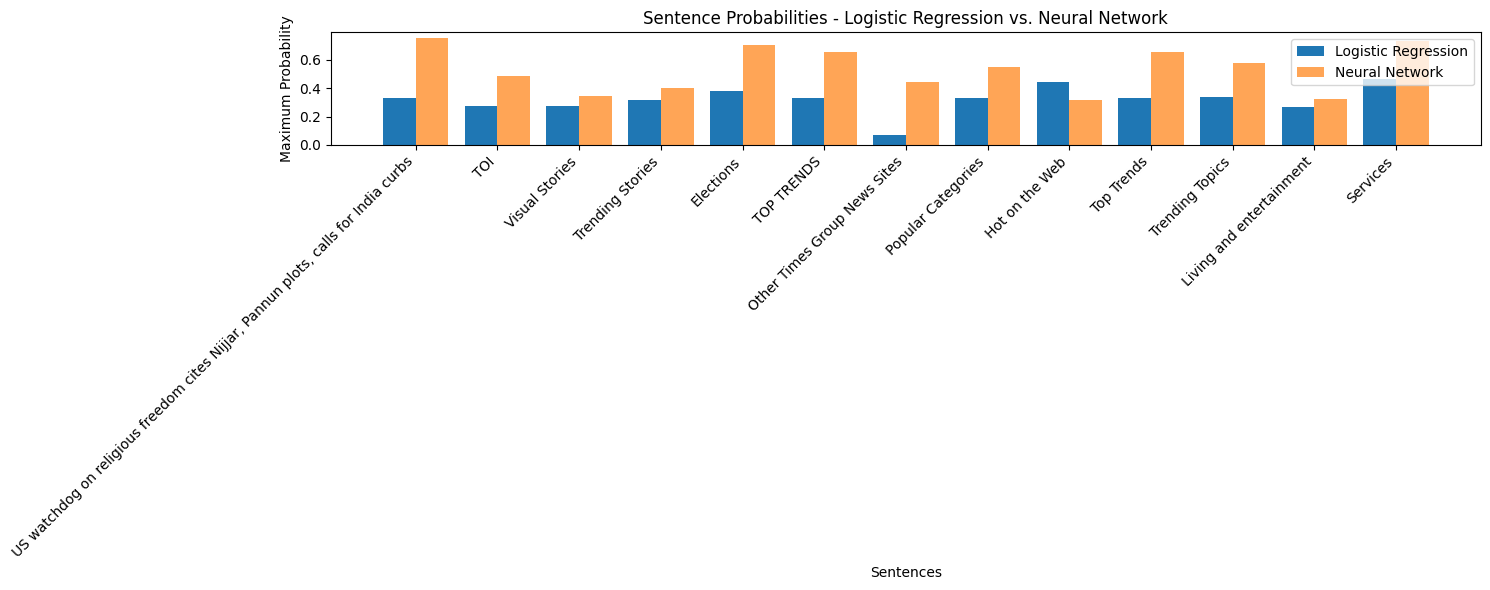

In [71]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
import requests
import string
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt

# Function to scrape headlines from a website
def scrape_headlines(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract headlines using different heading tags (h1, h2, h3, h4)
    headlines = []
    for heading_tag in ['h1', 'h2', 'h3', 'h4']:
        elements = soup.find_all(heading_tag)
        headlines.extend([element.text.strip() for element in elements])

    return headlines

# Scrape headlines from a website
website_url = input("Enter a URL- ")
headlines = scrape_headlines(website_url)

# Read 'True.csv' and 'Fake.csv' files
true_data_list = []
with open('/content/True.csv', 'r', encoding='utf-8', errors='ignore') as true_file:
    for line in true_file:
        try:
            true_data_list.append(line.strip())
        except Exception as e:
            print(f"Error reading line from True CSV: {e}")

fake_data_list = []
with open('/content/Fake.csv', 'r', encoding='utf-8', errors='ignore') as fake_file:
    for line in fake_file:
        try:
            fake_data_list.append(line.strip())
        except Exception as e:
            print(f"Error reading line from Fake CSV: {e}")

# Convert the list of lines into DataFrames for True and Fake data
true_data = pd.DataFrame({'text': true_data_list})
fake_data = pd.DataFrame({'text': fake_data_list})

# Add labels based on dataset type
true_data['label'] = 1  # 1 for True news
fake_data['label'] = 0  # 0 for Fake news

# Concatenate the True and Fake datasets
data = pd.concat([true_data, fake_data])

# Drop rows with NaN values in the 'text' column
data = data.dropna(subset=['text'])

X = data['text']
y = data['label']

# Replace NaN values with empty strings
X = X.fillna('')

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_tfidf, y_train)

# Train Neural Network model (MLP)
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100)
nn_model.fit(X_train_tfidf, y_train)

# Processing headlines
# Processing headlines
sentence_probabilities = []

for headline in headlines:
    selected_text = headline  # Use the scraped headline

    # Tokenize sentences instead of words
    sentences = sent_tokenize(selected_text)

    # Check if sentences list is not empty
    if sentences:
        sentence_tfidf = vectorizer.transform(sentences)

        # Ensure that at least one sample is present
        if sentence_tfidf.shape[0] > 0:
            sentence_logistic_prob = logistic_model.predict_proba(sentence_tfidf)[:, 1]
            sentence_nn_prob = nn_model.predict_proba(sentence_tfidf)[:, 1]

            sentence_probabilities.append({
                'sentence': selected_text,
                'logistic_true_probability': max(sentence_logistic_prob),
                'nn_true_probability': max(sentence_nn_prob)
            })

# Create a DataFrame for visualization
probabilities_df = pd.DataFrame(sentence_probabilities)

for index, row in probabilities_df.iterrows():
    print(f"Sentence: {row['sentence']}")
    print(f"Logistic Regression Probability: {row['logistic_true_probability']}")
    print(f"Neural Network Probability: {row['nn_true_probability']}")
    print("=" * 30)

# Plotting
bar_width = 0.4  # Adjust this value to control the width of each bar
bar_positions_logistic = range(len(probabilities_df))
bar_positions_nn = [pos + bar_width for pos in bar_positions_logistic]

fig, ax = plt.subplots(figsize=(15, 6))

# Plot Logistic Regression probabilities
ax.bar(bar_positions_logistic, probabilities_df['logistic_true_probability'], width=bar_width, label='Logistic Regression')

# Plot Neural Network probabilities
ax.bar(bar_positions_nn, probabilities_df['nn_true_probability'], width=bar_width, alpha=0.7, label='Neural Network')

ax.set_xlabel('Sentences')
ax.set_ylabel('Maximum Probability')
ax.set_title('Sentence Probabilities - Logistic Regression vs. Neural Network')
ax.legend()

# Set x-axis ticks and labels
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions_logistic])
ax.set_xticklabels(probabilities_df['sentence'], rotation=45, ha='right')

# Use plt.tight_layout() instead of ax.tight_layout()
plt.tight_layout()
plt.show()






